# Working with outliers and missing data.

Working with dataset: https://archive.ics.uci.edu/ml/datasets/Annealing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
names=["family","product-type","steel","carbon","hardness","temper_rolling","condition","formability","strength","non-ageing","surface-finish",
       "surface-quality","enamelability","bc","bf","bt","bw/me","bl","m","chrom","phos","cbond","marvi","exptl","ferro","corr","blue/bright/varn/clean",
       "lustre","jurofm","s","p","shape","thick","width","len","oil","bore","packing","classes"]
data=pd.read_csv("../Datas/Annealing/anneal.data",header=None,names=names,index_col=None)

In [3]:
data

,family,product-type,steel,carbon,hardness,temper_rolling,condition,formability,strength,non-ageing,...,s,p,shape,thick,width,len,oil,bore,packing,classes
0,?,C,A,8,0,?,S,?,0,?,...,?,?,COIL,0.700,610.0,0,?,0,?,3
1,?,C,R,0,0,?,S,2,0,?,...,?,?,COIL,3.200,610.0,0,?,0,?,3
2,?,C,R,0,0,?,S,2,0,?,...,?,?,SHEET,0.700,1300.0,762,?,0,?,3
3,?,C,A,0,60,T,?,?,0,?,...,?,?,COIL,2.801,385.1,0,?,0,?,3
4,?,C,A,0,60,T,?,?,0,?,...,?,?,SHEET,0.801,255.0,269,?,0,?,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,?,C,A,0,50,T,?,?,0,?,...,?,?,COIL,1.001,50.0,0,Y,0,?,3
794,?,C,?,0,0,?,S,1,0,?,...,?,?,SHEET,0.699,1300.0,4880,?,0,?,3
795,?,C,A,0,0,?,S,2,0,?,...,?,?,COIL,0.400,609.9,0,?,0,?,3
796,?,C,A,0,0,?,S,2,0,?,...,?,?,SHEET,3.200,610.0,4880,?,0,?,3


In [4]:
# Converting all atributes "?" to missing values, in this case with NAN (Not a Number)
data=data.replace("?",np.nan)

In [5]:
data

,family,product-type,steel,carbon,hardness,temper_rolling,condition,formability,strength,non-ageing,...,s,p,shape,thick,width,len,oil,bore,packing,classes
0,NaN,C,A,8,0,NaN,S,NaN,0,NaN,...,NaN,NaN,COIL,0.700,610.0,0,NaN,0,NaN,3
1,NaN,C,R,0,0,NaN,S,2,0,NaN,...,NaN,NaN,COIL,3.200,610.0,0,NaN,0,NaN,3
2,NaN,C,R,0,0,NaN,S,2,0,NaN,...,NaN,NaN,SHEET,0.700,1300.0,762,NaN,0,NaN,3
3,NaN,C,A,0,60,T,NaN,NaN,0,NaN,...,NaN,NaN,COIL,2.801,385.1,0,NaN,0,NaN,3
4,NaN,C,A,0,60,T,NaN,NaN,0,NaN,...,NaN,NaN,SHEET,0.801,255.0,269,NaN,0,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,NaN,C,A,0,50,T,NaN,NaN,0,NaN,...,NaN,NaN,COIL,1.001,50.0,0,Y,0,NaN,3
794,NaN,C,NaN,0,0,NaN,S,1,0,NaN,...,NaN,NaN,SHEET,0.699,1300.0,4880,NaN,0,NaN,3
795,NaN,C,A,0,0,NaN,S,2,0,NaN,...,NaN,NaN,COIL,0.400,609.9,0,NaN,0,NaN,3
796,NaN,C,A,0,0,NaN,S,2,0,NaN,...,NaN,NaN,SHEET,3.200,610.0,4880,NaN,0,NaN,3


Selecting only a few columns for this excersice:

In [6]:
for i in data.columns:
    perc=len(data[data[i].isna()][i])/len(data)*100
    if perc<=85:
        print(i,np.round(perc))

product-type 0.0
steel 9.0
carbon 0.0
hardness 0.0
temper_rolling 85.0
condition 34.0
formability 35.0
strength 0.0
surface-quality 27.0
bw/me 76.0
bl 83.0
shape 0.0
thick 0.0
width 0.0
len 0.0
bore 0.0
classes 0.0


In [7]:
cols_to_keep=["product-type","steel","carbon","hardness","condition","formability","strength","surface-quality","bw/me","bl",
             "shape","thick","width","len","bore","classes"]

In [8]:
data_keep=data[cols_to_keep]

In [9]:
data_keep

,product-type,steel,carbon,hardness,condition,formability,strength,surface-quality,bw/me,bl,shape,thick,width,len,bore,classes
0,C,A,8,0,S,NaN,0,G,NaN,NaN,COIL,0.700,610.0,0,0,3
1,C,R,0,0,S,2,0,E,NaN,NaN,COIL,3.200,610.0,0,0,3
2,C,R,0,0,S,2,0,E,B,NaN,SHEET,0.700,1300.0,762,0,3
3,C,A,0,60,NaN,NaN,0,G,M,NaN,COIL,2.801,385.1,0,0,3
4,C,A,0,60,NaN,NaN,0,G,B,Y,SHEET,0.801,255.0,269,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,C,A,0,50,NaN,NaN,0,G,NaN,NaN,COIL,1.001,50.0,0,0,3
794,C,NaN,0,0,S,1,0,G,NaN,NaN,SHEET,0.699,1300.0,4880,0,3
795,C,A,0,0,S,2,0,E,B,NaN,COIL,0.400,609.9,0,0,3
796,C,A,0,0,S,2,0,G,B,NaN,SHEET,3.200,610.0,4880,0,3


## Métodos de eliminación

Los métodos de eliminación son los más sencillos de usar. En la práctica la idea es eliminar datos que tienen valores perdidos o ausentes. Existen tres metodologías estándares: Análisis de datos completos (listwise), Análisis de datos disponibles (pairwise) o eliminación de variables. Vamos a ver algunos.

En Python hay una función que nos permite imputar datos y filtrar solo aquellos que tienen información, la función es llamada `dropna()`

In [10]:
?pd.DataFrame.dropna

Signature:
pd.DataFrame.dropna(
    self,
    axis: 'Axis' = 0,
    how: 'str' = 'any',
    thresh=None,
    subset=None,
    inplace: 'bool' = False,
)
Docstring:
Remove missing values.

See the :ref:`User Guide <missing_data>` for more on which values are
considered missing, and how to work with missing data.

Parameters
----------
axis : {0 or 'index', 1 or 'columns'}, default 0
    Determine if rows or columns which contain missing values are
    removed.

    * 0, or 'index' : Drop rows which contain missing values.
    * 1, or 'columns' : Drop columns which contain missing value.

    .. versionchanged:: 1.0.0

       Pass tuple or list to drop on multiple axes.
       Only a single axis is allowed.

how : {'any', 'all'}, default 'any'
    Determine if row or column is removed from DataFrame, when we have
    at least one NA or all NA.

    * 'any' : If any NA values are present, drop that row or column.
    * 'all' : If all values are NA, drop that row or column.

thresh : int, 

### Análisis de Datos Completos (listwise)

Normalmente los paquetes estadísticos cuando se usan para hacer análisis usan sólo los datos que están disponibles. No es necesariamente la mejor práctica debido a que esto introduce necesariamente sesgo en la información. En la metodología listwise se asume que los datos faltantes están completamente ausentes. Esto significa que sólo trabajaremos con los datos que tienen información completa para todas las variables y los datos ausentes se eliminan.

In [11]:
print("El tamaño de los datos es con solo información en todas las variables es: {}({})%".format(len(data_keep.dropna()),
     np.round(len(data_keep.dropna())/len(data_keep)*100,2)))
data_keep2=data_keep.dropna()
data_keep2.head()

El tamaño de los datos es con solo información en todas las variables es: 56(7.02)%


,product-type,steel,carbon,hardness,condition,formability,strength,surface-quality,bw/me,bl,shape,thick,width,len,bore,classes
12,C,R,0,0,S,2,0,E,B,Y,SHEET,1.200,610.0,150,0,3
50,C,A,0,0,S,2,0,E,B,Y,SHEET,0.700,609.9,762,0,3
52,C,R,0,0,S,2,0,E,B,Y,SHEET,1.599,1300.0,762,0,3
61,C,A,0,0,S,3,0,F,B,Y,SHEET,0.600,1220.0,762,0,3
103,C,A,0,0,S,2,0,F,B,Y,SHEET,0.699,610.0,761,0,3


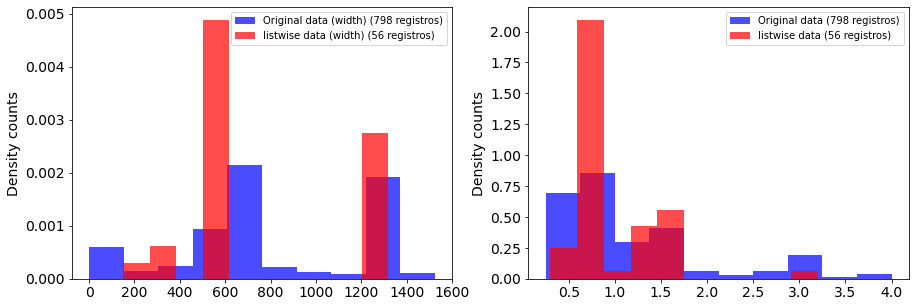

In [12]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.hist(data_keep["width"],density=True,label="Original data (width) ({} registros)".format(len(data_keep)),alpha=.7,color='b')
plt.hist(data_keep2["width"],density=True,label="listwise data (width) ({} registros)".format(len(data_keep2)),alpha=.7,color='r')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("Density counts",fontsize=14)
plt.legend()
plt.subplot(122)
plt.hist(data_keep["thick"],density=True,label="Original data ({} registros)".format(len(data_keep)),alpha=.7,color='b')
plt.hist(data_keep2["thick"],density=True,label="listwise data ({} registros)".format(len(data_keep2)),alpha=.7,color='r')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("Density counts",fontsize=14)
plt.legend()
plt.savefig("../../figures/annealing2_hist.png",bbox_inches ="tight")
plt.show()

### Análisis de datos disponibles (pairwise)

En listwise, un caso se elimina de un análisis porque tiene un valor perdido en al menos una de las variables especificadas. El análisis sólo se ejecuta en los casos que tienen un conjunto completo de datos.

La eliminación por pares (pairwise) se produce cuando el procedimiento estadístico utiliza casos que contienen algunos datos que faltan. El procedimiento no puede incluir una variable concreta cuando tiene un valor perdido, pero puede seguir utilizando el caso al analizar otras variables con valores no perdidos. Un caso puede contener 3 variables: VAR1, VAR2 y VAR3. Un caso puede tener un valor perdido para VAR1, pero esto no impide que algunos procedimientos estadísticos utilicen el mismo caso para analizar las variables VAR2 y VAR3. La eliminación por pares le permite utilizar más datos. Sin embargo, cada estadística calculada puede basarse en un subconjunto diferente de casos. Esto puede ser problemático. Por ejemplo, una matriz de correlación calculada mediante la eliminación por pares puede no ser semidefinida positiva. Es decir, puede tener valores propios negativos, lo que puede crear problemas para varios análisis estadísticos. Esto puede ocurrir porque cuando las correlaciones se calculan utilizando diferentes casos, los patrones resultantes pueden ser imposibles de producir con datos completos.

In [13]:
subset=["product-type","steel","carbon","hardness","strength","surface-quality","shape","thick","width","len","bore","classes"]
print("El tamaño de los datos es con solo información en todas las variables es: {}({})%".format(len(data_keep.dropna(subset=subset)),
     np.round(len(data_keep.dropna(subset=subset))/len(data_keep)*100,2)))
data_keep3=data_keep.dropna(subset=subset)
data_keep3.head()

El tamaño de los datos es con solo información en todas las variables es: 535(67.04)%


,product-type,steel,carbon,hardness,condition,formability,strength,surface-quality,bw/me,bl,shape,thick,width,len,bore,classes
0,C,A,8,0,S,NaN,0,G,NaN,NaN,COIL,0.700,610.0,0,0,3
1,C,R,0,0,S,2,0,E,NaN,NaN,COIL,3.200,610.0,0,0,3
2,C,R,0,0,S,2,0,E,B,NaN,SHEET,0.700,1300.0,762,0,3
3,C,A,0,60,NaN,NaN,0,G,M,NaN,COIL,2.801,385.1,0,0,3
4,C,A,0,60,NaN,NaN,0,G,B,Y,SHEET,0.801,255.0,269,0,3


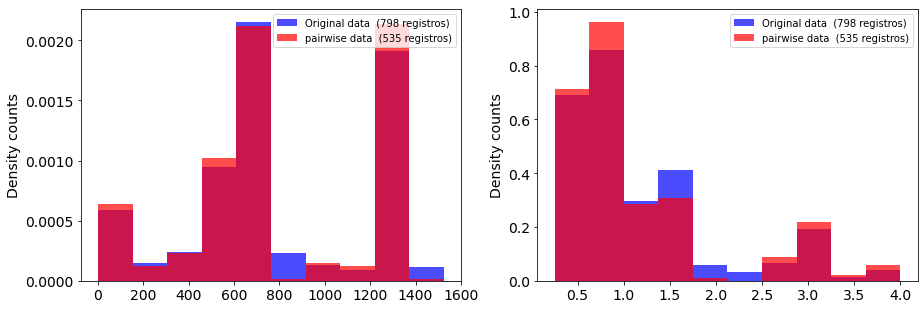

In [14]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.hist(data_keep["width"],density=True,label="Original data  ({} registros)".format(len(data_keep)),alpha=.7,color='b')
plt.hist(data_keep3["width"],density=True,label="pairwise data  ({} registros)".format(len(data_keep3)),alpha=.7,color='r')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("Density counts",fontsize=14)
plt.legend()
plt.subplot(122)
plt.hist(data_keep["thick"],density=True,label="Original data  ({} registros)".format(len(data_keep)),alpha=.7,color='b')
plt.hist(data_keep3["thick"],density=True,label="pairwise data  ({} registros)".format(len(data_keep3)),alpha=.7,color='r')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("Density counts",fontsize=14)
plt.legend()
plt.savefig("../../figures/annealing3_hist.png",bbox_inches ="tight")
plt.show()

In [15]:
for i in data_keep.columns:
    perc=len(data_keep[data_keep[i].isna()][i])/len(data_keep)*100
    if perc<=85:
        print(i,np.round(perc))

product-type 0.0
steel 9.0
carbon 0.0
hardness 0.0
condition 34.0
formability 35.0
strength 0.0
surface-quality 27.0
bw/me 76.0
bl 83.0
shape 0.0
thick 0.0
width 0.0
len 0.0
bore 0.0
classes 0.0


## Métodos de imputación

Los métodos de imputación se diferencian de los métodos de eliminación en que en vez de borrar datos, lo que se quiere hacer es reconfigurar o más bien, reemplazar los datos faltantes siguiendo algunas consideraciones o bajo ciertos supuestos que esperamos que sean válidos. Algunos tipos de imputación son: Imputación por medias no condicionadas, Imputación por medias condicionadas mediante métodos de regresión, Máxima Verosimilitud (MV), Imputación Múltiple (IM). Vamos a ver algunos.

### Imputación por medias no condicionadas

La sustitución de datos utilizando promedios, o medianas o modas es una vieja práctica y a veces útil que han usado los investigadores de diversas disciplinas, a pesar de que por sus limitaciones teóricas no se considera un procedimiento apropiado. En su aplicación se asume que los datos faltantes siguen un patrón MCAR (Missing Completely at Random), y ha sido ampliamente documentado que su aplicación afecta la distribución de probabilidad de la variable imputada, atenúa la correlación con el resto de las variables y subestima la varianza, entre otras cosas.
Por la manera en que se realiza la sustitución de los datos ausente, la suma de cuadrados de las desviaciones de las observaciones respecto de la media permanece inalterada pero se incrementa el tamaño de muestra, lo cual origina que la varianza de la variable disminuya y se generen, en forma artificial, intervalos de confianza más estrechos. A pesar de los inconvenientes señalados, es común el uso de esta metodología ya que existe la falsa creencia de que en una distribución de probabilidad normal el promedio de los datos es un buen estimador de las observaciones omitidas. En caso de que las variables imputadas se utilicen en análisis secundario de datos, se demuestra, por ejemplo, que en los modelos de regresión se alteran los valores de los parámetros estimados, así como su significancia estadística. Asimismo, los problemas se multiplican en la medida de que la falta de respuesta se incrementa.

Sin embargo, este es uno de los métodos más comunes de imputación de valores cuando se trata de datos que faltan. En los casos en los que hay un pequeño número de observaciones ausentes, los científicos de datos pueden calcular la media o la mediana de las observaciones existentes. Sin embargo, cuando hay muchas variables que faltan, los resultados de la media o la mediana pueden suponer una pérdida de variación en los datos.

Veamos algún ejemplo.

En Python existen dos funciones para reemplazar los valores NAN con algún otro valor que se desee. La función llamada `fillna()` cuando usamos pandas y otra llamada `replace()` cuando usamos numpy.

In [16]:
?pd.DataFrame.fillna

Signature:
pd.DataFrame.fillna(
    self,
    value: 'object | ArrayLike | None' = None,
    method: 'FillnaOptions | None' = None,
    axis: 'Axis | None' = None,
    inplace: 'bool' = False,
    limit=None,
    downcast=None,
) -> 'DataFrame | None'
Docstring:
Fill NA/NaN values using the specified method.

Parameters
----------
value : scalar, dict, Series, or DataFrame
    Value to use to fill holes (e.g. 0), alternately a
    dict/Series/DataFrame of values specifying which value to use for
    each index (for a Series) or column (for a DataFrame).  Values not
    in the dict/Series/DataFrame will not be filled. This value cannot
    be a list.
method : {'backfill', 'bfill', 'pad', 'ffill', None}, default None
    Method to use for filling holes in reindexed Series
    pad / ffill: propagate last valid observation forward to next valid
    backfill / bfill: use next valid observation to fill gap.
axis : {0 or 'index', 1 or 'columns'}
    Axis along which to fill missing values.
in

In [17]:
mean_formability=np.nanmean(data_keep["formability"].astype("float"))
median_formability=np.nanmedian(data_keep["formability"].astype("float"))

In [18]:
data_keep["formability_mean"]=data_keep["formability"].fillna(mean_formability)
data_keep["formability_median"]=data_keep["formability"].fillna(median_formability)

<ipython-input-18-41b848a12444>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_keep["formability_mean"]=data_keep["formability"].fillna(mean_formability)
<ipython-input-18-41b848a12444>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_keep["formability_median"]=data_keep["formability"].fillna(median_formability)


In [19]:
data_keep

,product-type,steel,carbon,hardness,condition,formability,strength,surface-quality,bw/me,bl,shape,thick,width,len,bore,classes,formability_mean,formability_median
0,C,A,8,0,S,NaN,0,G,NaN,NaN,COIL,0.700,610.0,0,0,3,2.223301,2.0
1,C,R,0,0,S,2,0,E,NaN,NaN,COIL,3.200,610.0,0,0,3,2,2
2,C,R,0,0,S,2,0,E,B,NaN,SHEET,0.700,1300.0,762,0,3,2,2
3,C,A,0,60,NaN,NaN,0,G,M,NaN,COIL,2.801,385.1,0,0,3,2.223301,2.0
4,C,A,0,60,NaN,NaN,0,G,B,Y,SHEET,0.801,255.0,269,0,3,2.223301,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,C,A,0,50,NaN,NaN,0,G,NaN,NaN,COIL,1.001,50.0,0,0,3,2.223301,2.0
794,C,NaN,0,0,S,1,0,G,NaN,NaN,SHEET,0.699,1300.0,4880,0,3,1,1
795,C,A,0,0,S,2,0,E,B,NaN,COIL,0.400,609.9,0,0,3,2,2
796,C,A,0,0,S,2,0,G,B,NaN,SHEET,3.200,610.0,4880,0,3,2,2


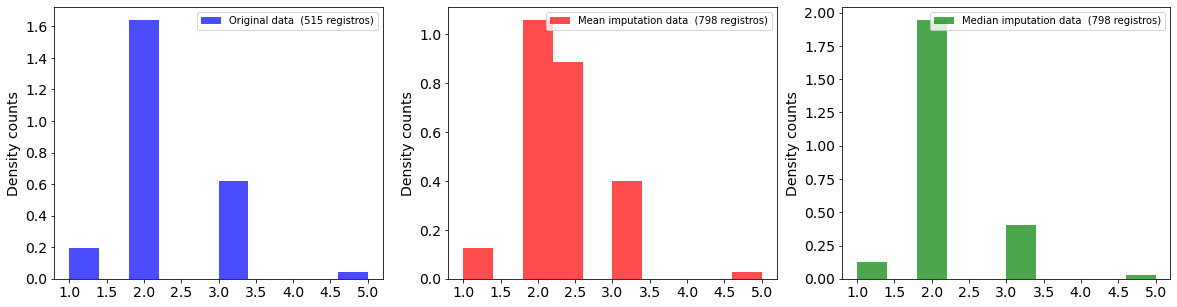

In [20]:
plt.figure(figsize=(20,5))
plt.subplot(131)
plt.hist(data_keep["formability"].astype("float"),density=True,label="Original data  ({} registros)".format(len(data_keep[~data_keep["formability"].isna()])),alpha=.7,color='b')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("Density counts",fontsize=14)
plt.legend()
plt.subplot(132)
plt.hist(data_keep["formability_mean"].astype("float"),density=True,label="Mean imputation data  ({} registros)".format(len(data_keep[~data_keep["formability_mean"].isna()])),alpha=.7,color='r')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("Density counts",fontsize=14)
plt.legend()
plt.subplot(133)
plt.hist(data_keep["formability_median"].astype("float"),density=True,label="Median imputation data  ({} registros)".format(len(data_keep[~data_keep["formability_median"].isna()])),alpha=.7,color='g')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("Density counts",fontsize=14)
plt.legend()
plt.savefig("../../figures/annealing4_hist.png",bbox_inches ="tight")
plt.show()

In [21]:
ii=len(data_keep[~data_keep["formability"].isna()])

In [22]:
ii

515